# José Domingo Cajina Ramírez

18/03/2020

---


*   Modelo Matemático de contagio COVID-19




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [0]:
!wget -cq https://raw.githubusercontent.com/Physicworld/COVID19/master/InfectadosEspa%C3%B1aMexico.csv

In [0]:
data = pd.read_csv("InfectadosEspañaMexico.csv", encoding='Latin-1', header=1)
data = pd.DataFrame(data)

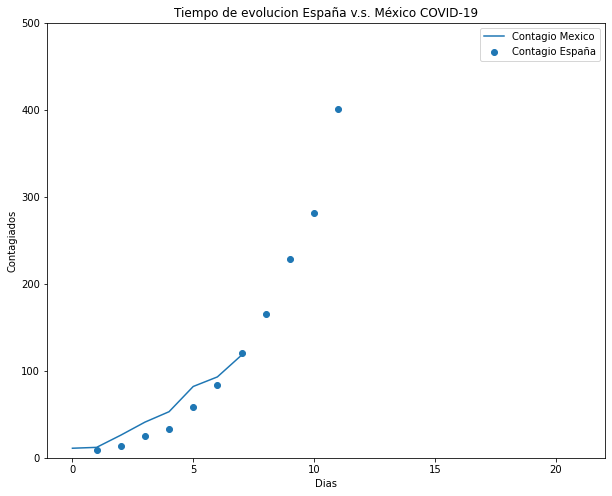

In [24]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia'],data['Casos'], label="Contagio España")
ax.plot(data['Casos.1'], label="Contagio Mexico")
#ax.plot(data['Muertos'], label="Muertos España", c="red")
plt.xlabel("Dias")
plt.ylabel("Contagiados")
plt.title("Tiempo de evolucion España v.s. México COVID-19")
plt.ylim(0,500)
plt.legend()
plt.savefig("Modelo_contagio con zoom")
plt.show()

In [68]:
x = data['Dia']
y = data['Casos']
#print(np.polyfit(x, np.log(y), 1))
print(curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(10, 0.3)))

(array([26.25444311,  0.28485121]), array([[ 3.16933320e+01, -6.08165294e-02],
       [-6.08165294e-02,  1.17602422e-04]]))


In [0]:
#y_teorica = 26.25444311exp(0.28485121x)

y_teorica = 26.25444311*np.exp(0.28485121*x)

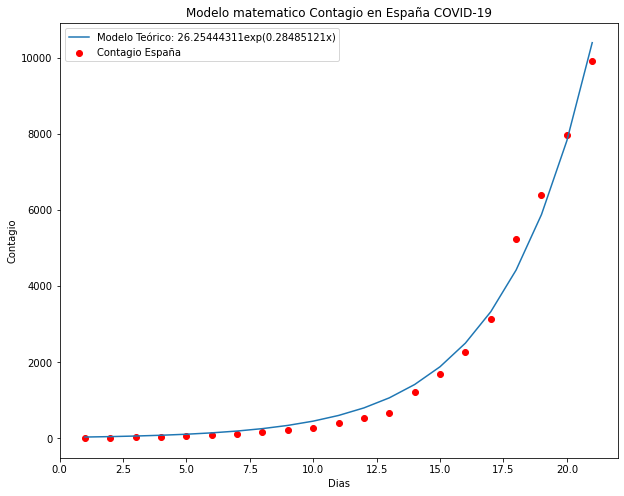

In [69]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia'],data['Casos'], label="Contagio España", c="red")
ax.plot(x, y_teorica, label = "Modelo Teórico: 26.25444311exp(0.28485121x)")
plt.xlabel("Dias")
plt.ylabel("Contagio")
plt.title("Modelo matematico Contagio en España COVID-19")
plt.legend()
plt.savefig("Modelo Matemático")
plt.show()


In [94]:
xm = data['Dia.1'].dropna()
ym = data['Casos.1'].dropna()
print(curve_fit(lambda t,a,b: a*np.exp(b*t),  xm,  ym,  p0=(4, 0.1)))

(array([12.20317505,  0.28935717]), array([[ 5.13352698e+00, -5.89485496e-02],
       [-5.89485496e-02,  7.10068961e-04]]))


0     11.0
1     12.0
2     26.0
3     41.0
4     53.0
5     82.0
6     93.0
7    118.0
Name: Casos.1, dtype: float64

In [0]:
ym_teorica =12.20323346*np.exp(0.28935646*x)

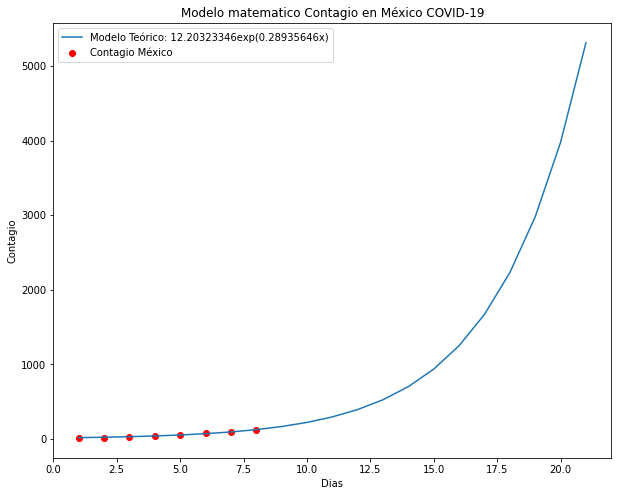

In [100]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia.1'],data['Casos.1'], label="Contagio México", c="red")
ax.plot(x, ym_teorica, label = "Modelo Teórico: 12.20323346exp(0.28935646x)")
plt.xlabel("Dias")
plt.ylabel("Contagio")
plt.title("Modelo matematico Contagio en México COVID-19")
plt.legend()
plt.savefig("Modelo Matemático Mexico")
plt.show()
